In [123]:
import pandas as pd
import numpy as np


In [27]:
X=np.random.choice(100,size=[100,2],replace=True)

In [103]:
points = np.random.choice(100,size=[10,2],replace=True)

In [50]:
def euclidean(X,point):
    return np.sqrt(np.sum((X-point)**2,axis=1))

In [101]:
class kmeans:
    def __init__(self,k):
        self.k = k
    def fit(self,X):
        assignment = [0]*len(X)
        new_assignment = [1]*len(X)
        new_centroids =[]
        while np.not_equal(assignment, new_assignment).any():
            assignment = new_assignment
            if len(new_centroids)==0:
                ran_idx = np.random.choice(len(X),size=self.k,replace=False)
                new_centroids = X[ran_idx,:]
            else:
                old_centroids = new_centroids
                new_centroids = np.empty([self.k,X.shape[1]])
                for i in range(self.k):
                    new_centroids[i,:]=np.mean(X[np.where(assignment==i),:],axis=1)
            all_dist = np.empty([len(X),self.k])
            for i in range(self.k):
                all_dist[:,i] = euclidean(X,new_centroids[i])

            new_assignment = np.argmin(all_dist,axis=1)
        self.centroids = new_centroids
        return {'clusters': new_assignment,'centroids':self.centroids}
    def predict(self, points):
        dist = np.empty([len(points),self.k])
        for i in range(self.k):
            dist[:,i]=euclidean(points,self.centroids[i])
        pred = np.argmin(dist,axis=1)
        return pred
            



In [106]:
km = kmeans(k=4)
res=km.fit(X)
pred=km.predict(points)

<Axes: >

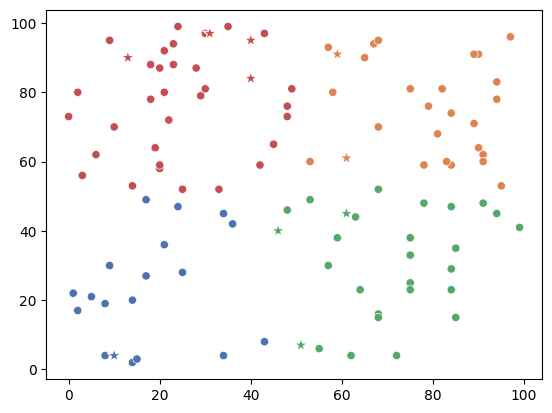

In [121]:
import seaborn as sns
sns.scatterplot(x=[x[0] for x in X],
                y=[x[1] for x in X],
                hue=res['clusters'],
                palette="deep",
                legend=None
                )
sns.scatterplot(x = [x[0] for x in points],
               y = [x[1] for x in points],
               hue = pred,marker='*',s=100,
               palette='deep',legend = None)
